In [4]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 

dt_clf = DecisionTreeClassifier()

wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [57]:
best = pd.DataFrame(index = wine.feature_names , data= dt_clf.feature_importances_,columns=['pct'])
best.sort_values(by ='pct',ascending=False)

,pct
flavanoids,0.538844
alcohol,0.441535
proanthocyanins,0.019621
malic_acid,0.000000
ash,0.000000
alcalinity_of_ash,0.000000
magnesium,0.000000
total_phenols,0.000000
nonflavanoid_phenols,0.000000
color_intensity,0.000000


In [55]:
label = []
for key, value in best.to_dict().items():
    label.append(f"{key}: {value}")
    
label

["index: {0: 'alcohol', 1: 'malic_acid', 2: 'ash', 3: 'alcalinity_of_ash', 4: 'magnesium', 5: 'total_phenols', 6: 'flavanoids', 7: 'nonflavanoid_phenols', 8: 'proanthocyanins', 9: 'color_intensity', 10: 'hue', 11: 'od280/od315_of_diluted_wines', 12: 'proline'}",
 'pct: {0: 0.44153497105304335, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.5388436864340479, 7: 0.0, 8: 0.01962134251290878, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0}']

In [40]:
best.squeeze()

alcohol                         0.441535
malic_acid                      0.000000
ash                             0.000000
alcalinity_of_ash               0.000000
magnesium                       0.000000
total_phenols                   0.000000
flavanoids                      0.538844
nonflavanoid_phenols            0.000000
proanthocyanins                 0.019621
color_intensity                 0.000000
hue                             0.000000
od280/od315_of_diluted_wines    0.000000
proline                         0.000000
Name: pct, dtype: float64

In [48]:
print(len(best.squeeze()), len(pd.Series(dict.fromkeys(label, 0))))

13 1


In [63]:
print(len(best.index), len(dt_clf.feature_importances_))

13 13


In [50]:
dict.fromkeys(label, 0)

{"pct: {'alcohol': 0.44153497105304335, 'malic_acid': 0.0, 'ash': 0.0, 'alcalinity_of_ash': 0.0, 'magnesium': 0.0, 'total_phenols': 0.0, 'flavanoids': 0.5388436864340479, 'nonflavanoid_phenols': 0.0, 'proanthocyanins': 0.01962134251290878, 'color_intensity': 0.0, 'hue': 0.0, 'od280/od315_of_diluted_wines': 0.0, 'proline': 0.0}": 0}

ValueError: could not convert string to float: 'alcohol'

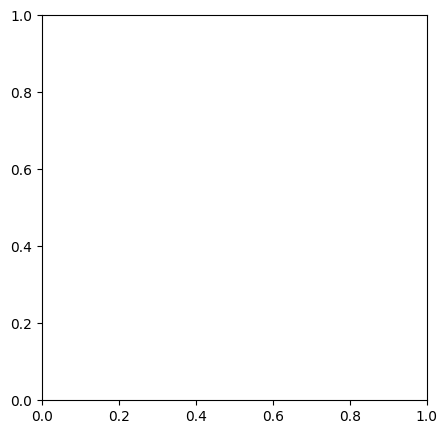

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,5))

frequency = best.index

label = []
for key, value in best.to_dict().items():
    label.append(f"{key}: {value}")

plt.pie(frequency,
    startangle = 180,
    labels = dt_clf.feature_importances_,
    colors = sns.color_palette('pastel', len(label)),
    wedgeprops = dict(width=0.7)
  )


plt.axis('equal')
plt.show()

Feature importances:

alcohol : 0.442
malic_acid : 0.000
ash : 0.000
alcalinity_of_ash : 0.000
magnesium : 0.000
total_phenols : 0.000
flavanoids : 0.539
nonflavanoid_phenols : 0.000
proanthocyanins : 0.020
color_intensity : 0.000
hue : 0.000
od280/od315_of_diluted_wines : 0.000
proline : 0.000


<AxesSubplot:>

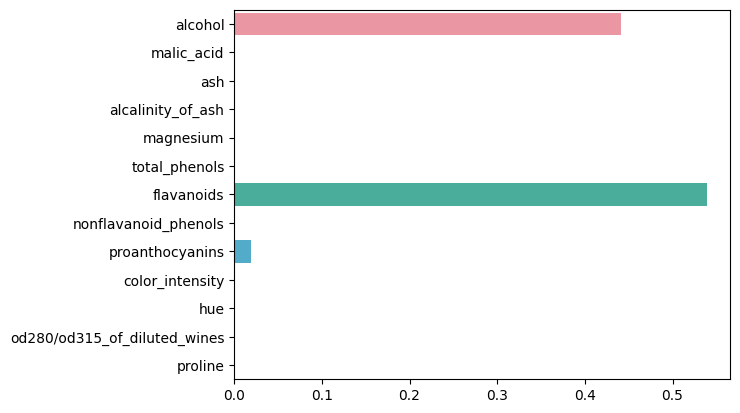

In [8]:
import seaborn as sns
import numpy as np
%matplotlib inline

print('Feature importances:\n'.format(np.round(dt_clf.feature_importances_, 3)))

for name, value in zip(wine.feature_names, dt_clf.feature_importances_) :
    print(f'{name} : {value:.3f}')
    
sns.barplot(x = dt_clf.feature_importances_, y = wine.feature_names)

In [74]:
import pandas as pd
import numpy as np

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df[:3]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


로지스틱 회귀와 KNN을 기반으로 하여 소프트 보팅 방식으로 보팅 분류기를 만들어보자. VotingClassifier 클래스를 이용하여 생성할 수 있다.

In [75]:
# 개별 모델은 로지스틱 회귀와 KNN
lr_clf = LogisticRegression(solver = 'liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
# voting 옵션에 hard 기입시 하드보딩 / soft 기입시 소프트 보딩
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=11)

# VotinVotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
vo_pred = vo_clf.predict(X_test)
print(f'voting 분류기 정확도 : {accuracy_score(y_test, vo_pred):.4f}')

voting 분류기 정확도 : 0.9474


In [76]:
# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers :
    classifier.fit(X_train, y_train)
    pred =  classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print(f'{class_name} 정확도 : {accuracy_score(y_test, pred):.4f}')

LogisticRegression 정확도 : 0.9474
KNeighborsClassifier 정확도 : 0.9561


In [77]:
# 보통 하드 보팅보다 소프트 보팅이 좋다고 했는데 여기서도 그럴까?
vo_clf_hard = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='hard')

vo_clf_hard.fit(X_train, y_train)
vo_pred = vo_clf_hard.predict(X_test)
print(f'voting 분류기 정확도 : {accuracy_score(y_test, vo_pred):.4f}')

voting 분류기 정확도 : 0.9561


엥 결과값이 `voting 분류기 정확도 : 0.9561` 으로 더 높게 나왔다. 이는 하드보팅의 경우 여러 분류기 중 가장 높은 결과값을 가져오기 때문으로 보인다. 따라서 이렇게 나온 정확도 만으로는 어느게 더 좋다 판단할 수 없는 부분인듯

In [83]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=11)

# 랜덤 포레스트
rf_clf = RandomForestClassifier(random_state = 0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print(f'RandomForest 정확도 : {accuracy}')

RandomForest 정확도 : 0.9824561403508771


In [80]:
# 중복된 피처명 정리
def get_new_feature_name_df(old_feature_name_df):
    # column_name으로 그룹지어서 cumcount()로 피처별 중복 존재시 숫자를 부여
    # reset_index()로 column_index를 생성한다
    feature_dup = pd.DataFrame(old_feature_name_df.groupby("column_name").cumcount()).reset_index()

    # features.txt의 column_index는 1부터 시작이기 때문에
    feature_dup.columns = ["column_index", "dup_cnt"]
    feature_dup["column_index"] = feature_dup["column_index"] + 1
    
    
    # column_index를 기준으로 머지 후 중복컬럼명 변경
    new_feature_name_df = pd.merge(old_feature_name_df, feature_dup, how='outer')
    # 만약 x라는 컬럼명이 있다면 x_1, x_2와 같이 변경되도록 한다
    new_feature_name_df['column_name'] = new_feature_name_df.apply(lambda x: x.column_name + "_" + str(x.dup_cnt) \
                                                                   if x.dup_cnt > 0 
                                                                   else x.column_name, axis=1)
    return new_feature_name_df 

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./UCI HAR Dataset/UCI HAR Dataset/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 경고메시지 무시하고 싶을때, 다시 켜고 싶다면 'default'
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_get_human_dataset()를 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state = 0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print(f'RandomForest 정확도 : {accuracy}')
# RandomForest 정확도 : 0.9195792331184255

RandomForest 정확도 : 0.9195792331184255


In [88]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [8, 16, 24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
    }

# RandomForestClassifier 객체 생성
# n_estimators = 생성할 결정트리의 갯수.
rf_clf = RandomForestClassifier(n_estimators=50, random_state=0, n_jobs=-1)

# GridSearchCV 생성
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 2, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print(f'최적 하이퍼 파라미터 :\n{grid_cv.best_params_}')
print(f'최고 예측 정확도 :\n{grid_cv.best_score_}')


# n_estimators = 100 일때
# 최적 하이퍼 파라미터 :
# {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}
# 최고 예측 정확도 :
# 0.9560244222892031

최적 하이퍼 파라미터 :
{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}
최고 예측 정확도 :
0.9560244222892031


In [90]:
rf_clf1 = RandomForestClassifier(n_estimators=100, min_samples_leaf=1, max_depth=6, min_samples_split=2, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print(f'예측 정확도 : {accuracy_score(y_test, pred)}')

# 예측 정확도 : 0.9824561403508771

예측 정확도 : 0.9824561403508771


In [97]:
from sklearn.ensemble import GradientBoostingClassifier
import time

# 사용자 정의 함수 get_human_dataset()을 이용해 데이터 가져오기
X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행시간 측정을 위함. 시작시간 설정
start_time = time.time()

# 학습 및 예측
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
pred = gb_clf.predict(X_test)

In [101]:
print(f'정확도 : {accuracy_score(y_test, pred)}')
print(f'수행시간 : {time.time() - start_time}')

정확도 : 0.9389209365456397
수행시간 : 1144.8965108394623


In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

# 피처별 중요도 상위 20개 뽑기
# 중요도를 변수에 담아주고
ftr_importance_values = rf_clf1.feature_importances_
# 중요도와 컬럼명을 변수에 담아줌
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
# 값으로 sorting하여 20개 자르기
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]

ftr_top20

worst perimeter            0.172372
worst radius               0.113298
mean concave points        0.087370
worst area                 0.086899
worst concave points       0.084124
mean perimeter             0.079804
mean concavity             0.059255
area error                 0.052285
mean area                  0.038816
worst concavity            0.027484
radius error               0.026148
mean radius                0.025458
worst texture              0.020172
perimeter error            0.019891
mean texture               0.015773
worst smoothness           0.013333
worst fractal dimension    0.011248
worst compactness          0.009950
worst symmetry             0.008632
mean smoothness            0.006465
dtype: float64

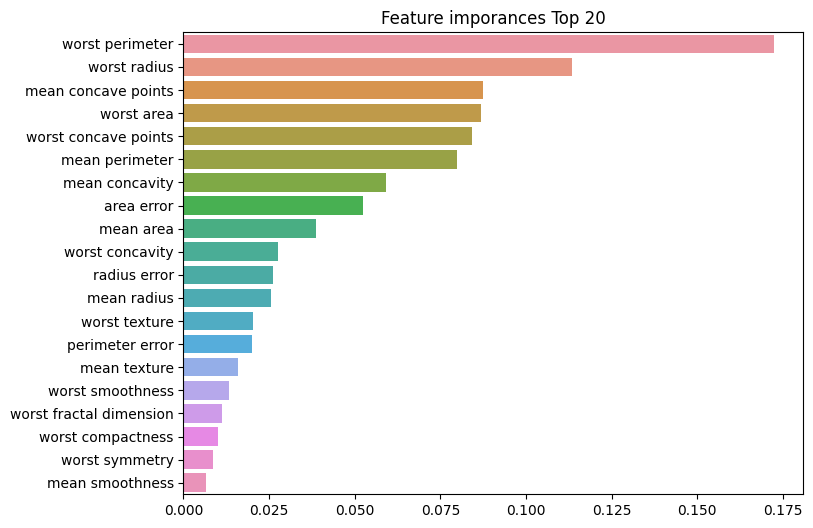

In [152]:
plt.figure(figsize=(8, 6))
plt.title('Feature imporances Top 20')
sns.barplot(x = ftr_top20, y=ftr_top20.index)
plt.show()

In [155]:
%%time
from sklearn.model_selection import GridSearchCV

params = {"n_estimators": [100, 500], "learning_rate": [0.05, 0.1]}

# GBM 객체 생성 후 GridSearchCV
gb_clf = GradientBoostingClassifier(random_state=0)
grid_cv2 = GridSearchCV(gb_clf, param_grid = params, cv=2, verbose=1)

grid_cv2.fit(X_train, y_train)

print(f"최고 예측 정확도:{grid_cv2.best_score_:.4f}")
print(f"최적 하이퍼 파라미터:\n{grid_cv2.best_params_}")
print()

Fitting 2 folds for each of 4 candidates, totalling 8 fits
최고 예측 정확도:0.9451
최적 하이퍼 파라미터:
{'learning_rate': 0.05, 'n_estimators': 500}

CPU times: total: 5.3 s
Wall time: 5.35 s


In [169]:
%%time
from sklearn.ensemble import RandomForestClassifier


params = {"n_estimators": [100, 500]}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv2 = GridSearchCV(rf_clf, param_grid = params, cv = 2, n_jobs = -1)

grid_cv2.fit(X_train, y_train)

print(f"최고 예측 정확도:{grid_cv2.best_score_:.4f}")
print(f"최적 하이퍼 파라미터:\n{grid_cv2.best_params_}")
print()

최고 예측 정확도:0.9516
최적 하이퍼 파라미터:
{'n_estimators': 100}

CPU times: total: 266 ms
Wall time: 3.45 s


In [106]:
!pip install xgboost


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 125.4/125.4 MB 2.8 MB/s eta 0:00:00


In [109]:
import xgboost

print(xgboost.__version__)

1.6.2


In [111]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target
cancer_df = pd.DataFrame(data = features, columns = dataset.feature_names)
cancer_df['target'] = labels
cancer_df[:3]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [112]:
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

In [113]:
dtr = xgb.DMatrix(data = X_tr, label = y_tr)
dval = xgb.DMatrix(data = X_val, label = y_val)
dtest = xgb.DMatrix(data = X_test, label = y_test)

In [114]:
params = {
    'max_depth' : 3,
    'eta' : 0.05,
    'objective' : 'binary:logistic',
    'eval_metric' : 'logloss'
    }
num_rounds = 400

In [116]:
eval_list = [(dtr, 'train'), (dval, 'eval')]

xgb_model = xgb.train(params= params, dtrain = dtr, num_boost_round = num_rounds, early_stopping_rounds = 50, evals=eval_list)

[0]	train-logloss:0.65114	eval-logloss:0.65415
[1]	train-logloss:0.61311	eval-logloss:0.61886
[2]	train-logloss:0.57846	eval-logloss:0.58680
[3]	train-logloss:0.54676	eval-logloss:0.55651
[4]	train-logloss:0.51768	eval-logloss:0.52982
[5]	train-logloss:0.49092	eval-logloss:0.50536
[6]	train-logloss:0.46617	eval-logloss:0.48088
[7]	train-logloss:0.44263	eval-logloss:0.45904
[8]	train-logloss:0.42084	eval-logloss:0.43889
[9]	train-logloss:0.39976	eval-logloss:0.42088
[10]	train-logloss:0.38091	eval-logloss:0.40527
[11]	train-logloss:0.36361	eval-logloss:0.38912
[12]	train-logloss:0.34646	eval-logloss:0.37279
[13]	train-logloss:0.33044	eval-logloss:0.35826
[14]	train-logloss:0.31468	eval-logloss:0.34599
[15]	train-logloss:0.29995	eval-logloss:0.33472
[16]	train-logloss:0.28673	eval-logloss:0.32439
[17]	train-logloss:0.27438	eval-logloss:0.31285
[18]	train-logloss:0.26214	eval-logloss:0.30401
[19]	train-logloss:0.25065	eval-logloss:0.29591
[20]	train-logloss:0.24041	eval-logloss:0.28722
[2

In [121]:
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target
cancer_df = pd.DataFrame(data = features, columns = dataset.feature_names)
cancer_df['target'] = labels
cancer_df[:3]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [132]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test, pred = None, pred_proba = None) :
    confusion = confusion_matrix(y_test, pred)    #  오차행렬
    accuracy = accuracy_score(y_test, pred)       # 정확도
    precision = precision_score(y_test, pred)     # 정밀도
    recall = recall_score(y_test, pred)           # 재현율
    
    f1 = f1_score(y_test, pred)      # F1 스코어
    
    # ROC-AUC
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    
    # ROC-AUC 추가
    print(f'정확도:{accuracy:.4f}, 정밀도:{precision:.4f}, 재현율:{recall:.4f}, f1_score:{f1:.4f}, AUC:{roc_auc:.4f}')

In [138]:
from xgboost import XGBRFClassifier

xgb_wrapper = XGBRFClassifier(n_estimators = 200, learning_rate=0.05, max_depth=3, eval_metric = 'logloss')
xgb_wrapper.fit(X_train, y_train, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[: ,1]

In [139]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차행렬
[[34  9]
 [ 3 68]]
정확도:0.8947, 정밀도:0.8831, 재현율:0.9577, f1_score:0.9189, AUC:0.9772


In [146]:
from xgboost import XGBClassifier
xgb_wrapper = XGBClassifier(n_estimators=800, learning_rate=0.05, max_depth=3, early_stopping_rounds=10)
evals = [(X_tr, y_tr), (X_val, y_val)] # 미입력해도 됨
xgb_wrapper.fit(X_tr, y_tr, 
                eval_metric="logloss", 
                eval_set=evals, 
                verbose=False)

ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws50_preds, ws50_pred_proba)

오차행렬
[[38  5]
 [ 3 68]]
정확도:0.9298, 정밀도:0.9315, 재현율:0.9577, f1_score:0.9444, AUC:0.9866
